<a href="https://www.kaggle.com/code/yeemeitsang/asthma-prediction?scriptVersionId=187483634" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("/kaggle/input/asthma-disease-dataset/asthma_disease_data.csv")
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,...,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,...,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,...,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,...,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,...,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid


In [3]:
df.isna().sum()

PatientID                 0
Age                       0
Gender                    0
Ethnicity                 0
EducationLevel            0
BMI                       0
Smoking                   0
PhysicalActivity          0
DietQuality               0
SleepQuality              0
PollutionExposure         0
PollenExposure            0
DustExposure              0
PetAllergy                0
FamilyHistoryAsthma       0
HistoryOfAllergies        0
Eczema                    0
HayFever                  0
GastroesophagealReflux    0
LungFunctionFEV1          0
LungFunctionFVC           0
Wheezing                  0
ShortnessOfBreath         0
ChestTightness            0
Coughing                  0
NighttimeSymptoms         0
ExerciseInduced           0
Diagnosis                 0
DoctorInCharge            0
dtype: int64

In [4]:
df.DoctorInCharge.describe()

count          2392
unique            1
top       Dr_Confid
freq           2392
Name: DoctorInCharge, dtype: object

In [5]:
df.Diagnosis.value_counts()

Diagnosis
0    2268
1     124
Name: count, dtype: int64

In [6]:
df.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'PollutionExposure', 'PollenExposure', 'DustExposure', 'PetAllergy',
       'FamilyHistoryAsthma', 'HistoryOfAllergies', 'Eczema', 'HayFever',
       'GastroesophagealReflux', 'LungFunctionFEV1', 'LungFunctionFVC',
       'Wheezing', 'ShortnessOfBreath', 'ChestTightness', 'Coughing',
       'NighttimeSymptoms', 'ExerciseInduced', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')

In [7]:
features = df.drop(['PatientID', 'Diagnosis', 'DoctorInCharge'], axis=1)
target = df['Diagnosis']

In [8]:
correlation_matrix = features.corrwith(target)

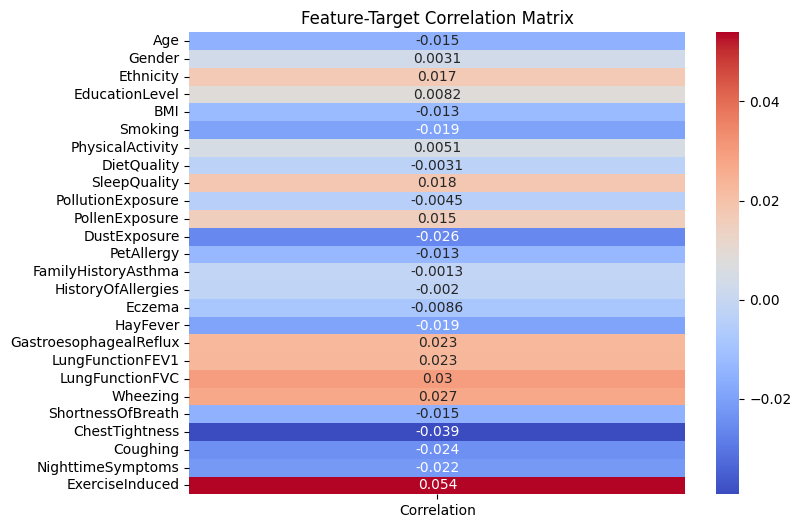

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(correlation_matrix, columns=['Correlation']), annot=True, cmap='coolwarm', cbar=True)
plt.title('Feature-Target Correlation Matrix')
plt.show()

In [10]:
threshold = 0.02
columns_to_drop = correlation_matrix[abs(correlation_matrix) < threshold].index
features = features.drop(columns_to_drop, axis=1)
features.head()

,DustExposure,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced
0,0.974339,0,1.369051,4.941206,0,1,0,0,1
1,6.584631,0,2.197767,1.702393,1,0,1,1,1
2,5.445799,0,1.698011,5.022553,1,1,0,1,1
3,3.965316,0,3.032037,2.300159,1,1,1,1,0
4,8.260605,0,3.470589,3.067944,1,1,0,0,1


In [11]:
features.describe()

,DustExposure,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,4.981864,0.158027,2.548564,3.741270,0.596154,0.503344,0.503344,0.602425,0.604933
std,2.859192,0.364842,0.861809,1.303689,0.490770,0.500093,0.500093,0.489499,0.488967
min,0.002434,0.000000,1.000459,1.500045,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.467489,0.000000,1.824113,2.607489,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.903278,0.000000,2.553244,3.734982,1.000000,1.000000,1.000000,1.000000,1.000000
75%,7.432218,0.000000,3.292897,4.864121,1.000000,1.000000,1.000000,1.000000,1.000000
max,9.999708,1.000000,3.999719,5.999421,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

smote = SMOTETomek(random_state=42)
X, y = smote.fit_resample(features, target)

In [13]:
target.describe(), y.describe()

(count    2392.000000
 mean        0.051839
 std         0.221749
 min         0.000000
 25%         0.000000
 50%         0.000000
 75%         0.000000
 max         1.000000
 Name: Diagnosis, dtype: float64,
 count    4532.000000
 mean        0.500000
 std         0.500055
 min         0.000000
 25%         0.000000
 50%         0.500000
 75%         1.000000
 max         1.000000
 Name: Diagnosis, dtype: float64)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9338478500551268

In [16]:
from sklearn.metrics import f1_score, ConfusionMatrixDisplay

def displayConfusionMatrix(y_true, y_pred):
    disp = ConfusionMatrixDisplay.from_predictions(
        y_true,
        y_pred,
        display_labels=["Negative",'Positive'],
        cmap=plt.cm.Blues
    )
    F1_Score = f1_score(y_true, y_pred)
    disp.ax_.set_title("Confusion Matrix -- F1 Score: " + str(F1_Score.round(2)))

In [17]:
y_pred = model.predict(X_test)
y_pred[:5]

array([1, 1, 0, 0, 1])

In [18]:
y_test.value_counts()

Diagnosis
0    461
1    446
Name: count, dtype: int64

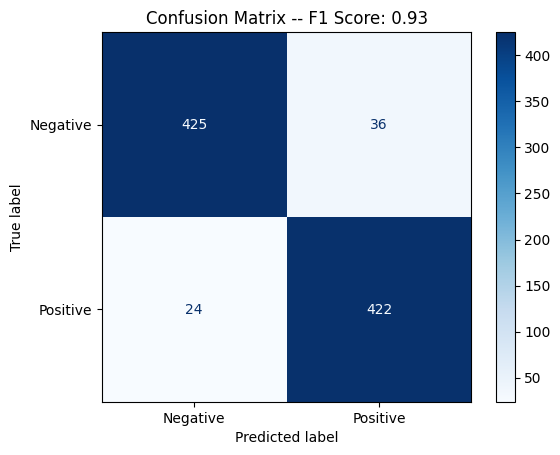

In [19]:
displayConfusionMatrix(y_test, y_pred)